# Gradient Descent Implementation

The aim of this notebook is to understand the Gradient Descent Optimization process in 
more detail. We implement the gradient calculation and weight update for a single 
variable (`m`) using single math operation. We will use the full form of a line i.e. 
`y = mx + c` and estimate the values of the two variables `m` and `c` using Stochastic 
Gradient Descent.

In [1]:
import matplotlib.pyplot as plt
import torch

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 8)
torch.manual_seed(21)

## 1. Generate Data

We will generate 1000 data points for the experiment. The `x` axis is the independent
variable which has values randomly distributed between -5 to 5. We assume some values 
for `m` and `c` to create the data points for the dependent variable (`y`-axis).
We also add randomness so that the `y` value are different for the same `x`.  

In [3]:
# Generate y = mx + c + random noise
n_data = 1000

# True value of m and c
m_line = 3.3
c_line = 3.3

# Generate random data x in range [-5, 5]
x = 10 * torch.rand(n_data) - 5

# Generate data y = mx + c + noise
y = m_line * x + c_line + torch.randn_like(x)

# The line
y_line = m_line * x + c_line

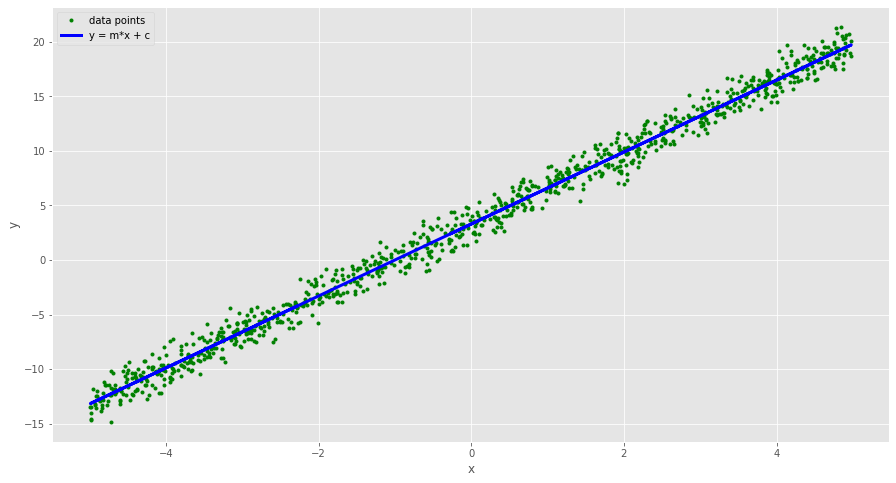

In [4]:
# Plot the generated data points
plt.plot(x, y, '.', color='g', label='data points')
plt.plot(x, y_line, color='b', label='y = m*x + c', linewidth=3)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

## 2. Problem Formulation

The goal is to predict $y$ given some value of $x$. To do this we will fit a line 
that goes through the data points $(x_{i}, y_{i})$. The equation for such a line is

\begin{equation}
y = mx + c
\end{equation}

We have a set of data points $(x_{i}, y_{i})$, and they should all satisfy the equation 
above. i.e.,

\begin{equation}
y_{i} = mx_{i} + c
\end{equation}

Because the data having noise, th best $m$ and $c$ we can find will not fit the 
data perfectly. So, we will have an **error** or **residual** given by

\begin{equation}
e_{i} = (y_{i} - mx_{i} - c)
\end{equation}

Out purpose is to find $m$ and $c$ that minimize the error above over all the 
data points

\begin{equation}
l = \sum^{N}_{i=1}(y_{i} - mx_{i} - c)^{2}
\end{equation}

The function above is called the **loss function**. The sum of squared errors is 
just one of loss function. The `mean squared error` function is given by

\begin{equation}
l_{mse} = \frac{1}{N} \sum^{N}_{i=1}(y_{i} - mx_{i} - c)^{2}
\end{equation}

## 3. Gradient Descent

We calculate the loss function and then take partial derivatives w.r.t `m` and `c`, 
respectively.

\begin{equation}
l = \sum^{N}_{i=1}(y_{i} - mx_{i} - c)^{2}
\end{equation}

\begin{equation}
\frac{\partial l}{\partial m} = -2\sum^{N}_{i=1}x_{i}(y_{i} - mx_{i} - c)
\end{equation}

\begin{equation}
\frac{\partial l}{\partial c} = \sum^{N}_{i=1}(y_{i} - mx_{i} - c)
\end{equation}

To follow the slope of curve, we need to move `m` in the direction of negative gradient. 
However, we need to control the rate at which we go down the slope to not overshoot the 
minimum. Therefore, er use parameter $\lambda$ called the `learning rate`. The updated 
`m` and `c` will be

\begin{equation}
m_{k} = m_{k-1} - \lambda\frac{\partial l}{\partial m}
\end{equation}

\begin{equation}
c_{k} = c_{k-1} - \lambda\frac{\partial l}{\partial c}
\end{equation}

### 3.1. Implementation of Gradients

In [5]:
def gradient_m_and_c(inputs, labels, m, c, k):
    g_m = -2 * torch.sum(inputs[k] * (labels[k] - m * inputs[k] - c))
    g_c = -2 * torch.sum((labels[k] - m * inputs[k] - c))
    return g_m, g_c

In [6]:
X = torch.tensor([-0.0374, 2.6822, -4.1152])
Y = torch.tensor([5.1765, 14.1513, -8.2802])
m = 2
c = 3
k = torch.tensor([0, 2])

g_m, g_c = gradient_m_and_c(X, Y, m, c, k)

print('Gradient of m: {:.2f}'.format(g_m))
print('Gradient of c: {:.2f}'.format(g_c))

Gradient of m: -24.93
Gradient of c: 1.60


### 3.2. Implementation of SGD

In [7]:
def update_m_and_c(m, c, g_m, g_c, lr):
    m = m - lr * g_m
    c = c - lr * g_c
    return m, c

In [8]:
m = 2
c = 3
g_m = -24.93
g_c = 1.6
lr = 0.001

m, c = update_m_and_c(m, c, g_m, g_c, lr)

print('Updated m: {:.2f}'.format(m))
print('Updated c: {:.2f}'.format(c))

Updated m: 2.02
Updated c: 3.00


### 3.3. Training with SGD and minibatch

iteration: 0, loss: 17191.256, updated m: 2.189, updated c: 1.048


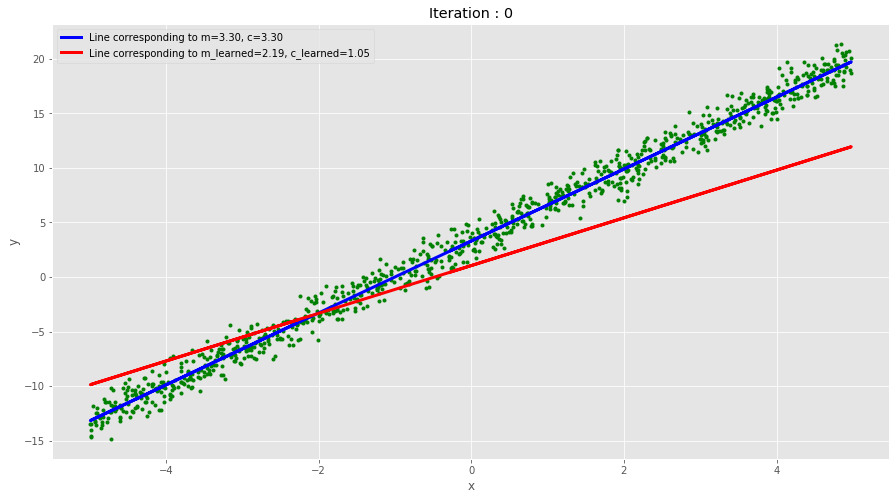

iteration: 100, loss: 1031.466, updated m: 3.287, updated c: 3.046


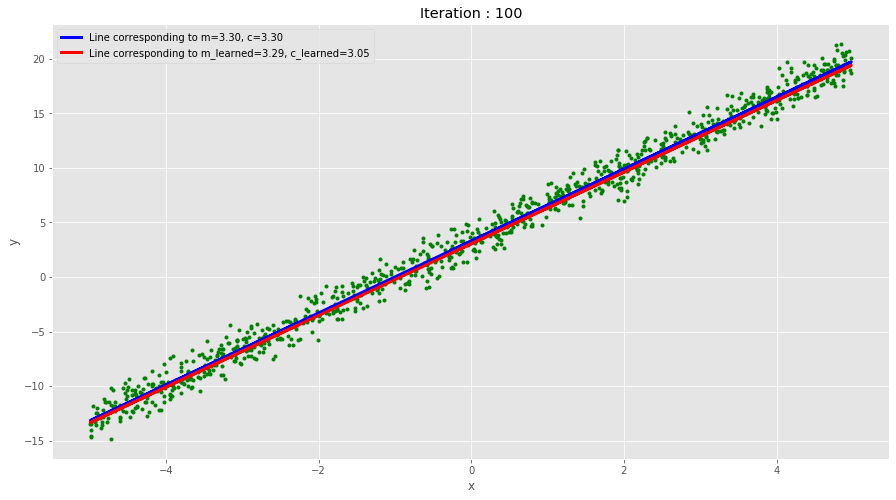

iteration: 200, loss: 946.273, updated m: 3.287, updated c: 3.326


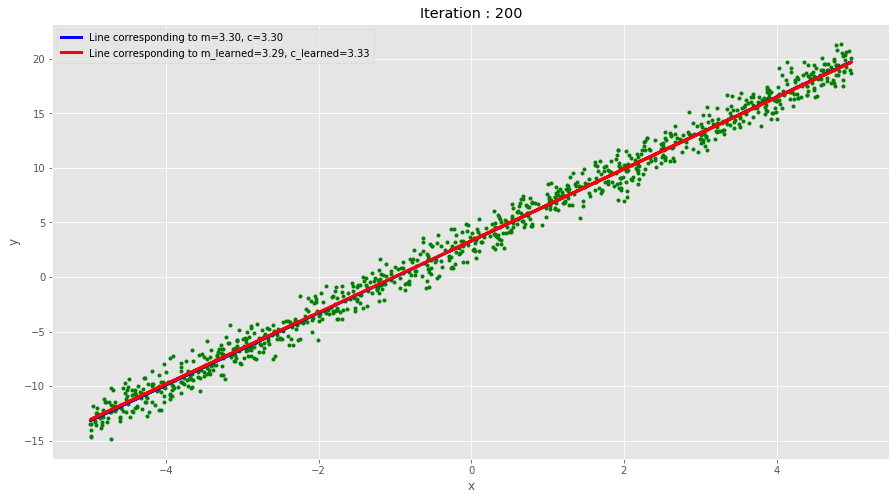

iteration: 300, loss: 946.001, updated m: 3.297, updated c: 3.390


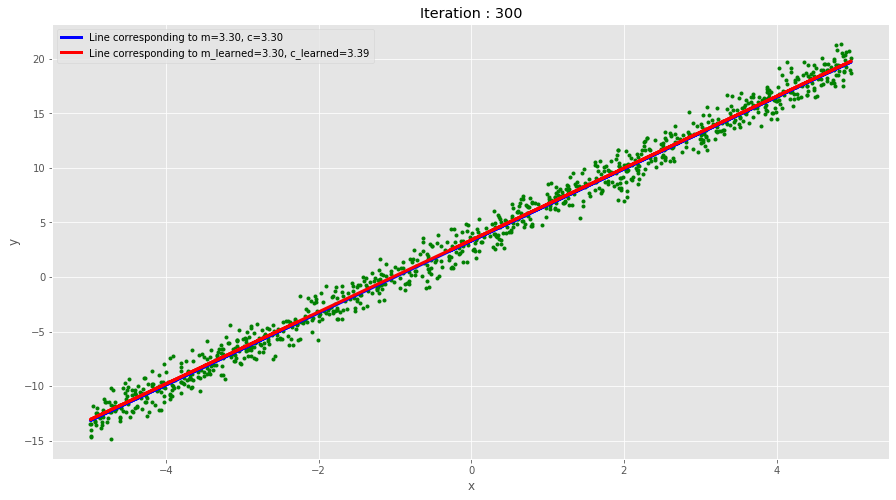

iteration: 400, loss: 981.247, updated m: 3.243, updated c: 3.297


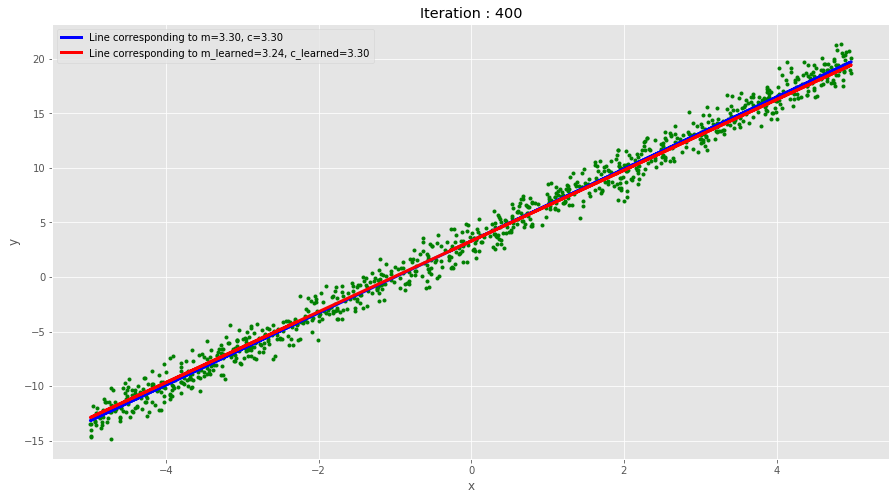

iteration: 500, loss: 951.239, updated m: 3.279, updated c: 3.301


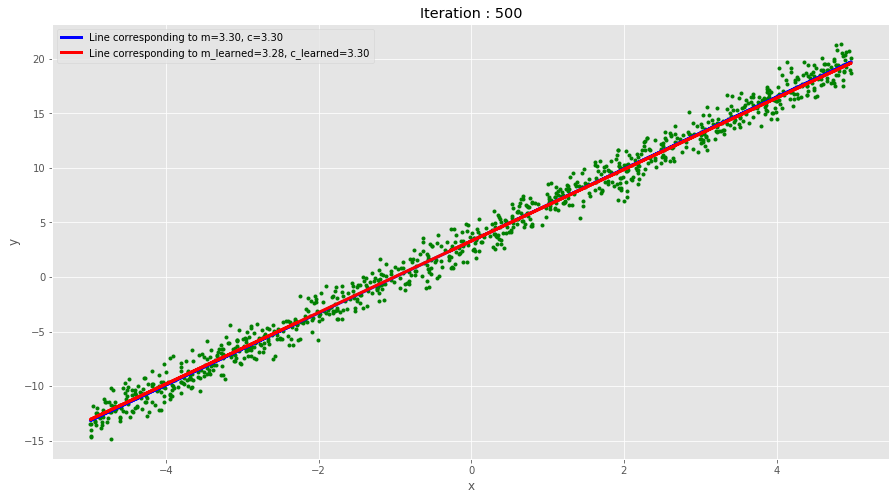

iteration: 600, loss: 985.374, updated m: 3.238, updated c: 3.354


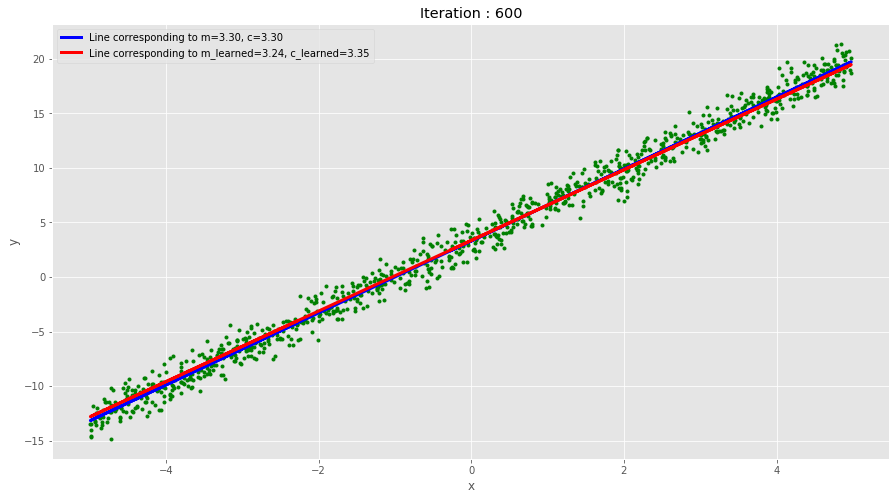

iteration: 700, loss: 942.734, updated m: 3.306, updated c: 3.362


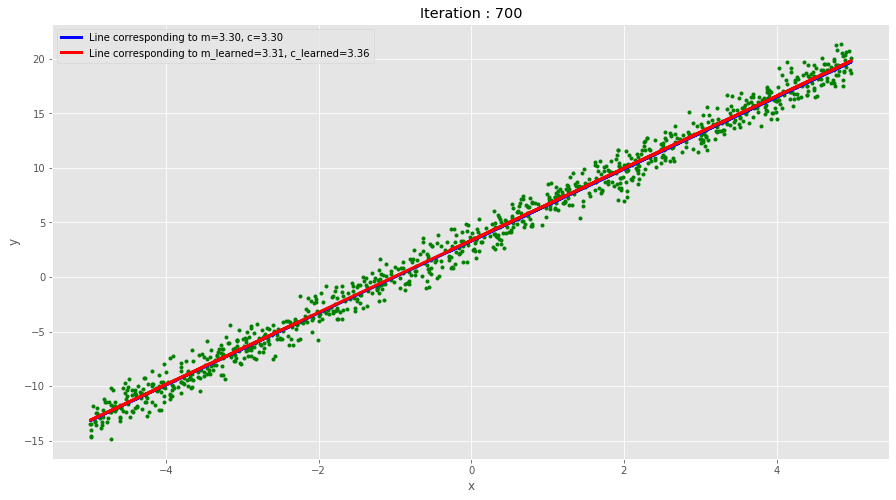

iteration: 800, loss: 946.458, updated m: 3.323, updated c: 3.287


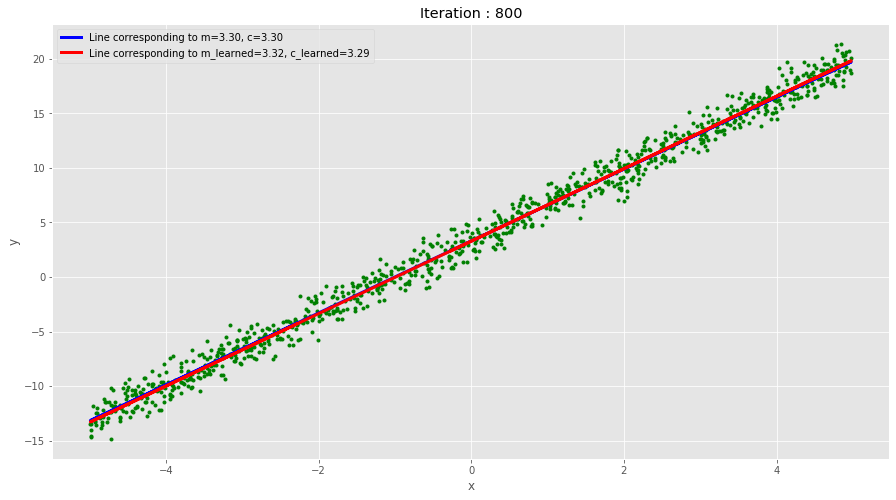

iteration: 900, loss: 945.150, updated m: 3.316, updated c: 3.287


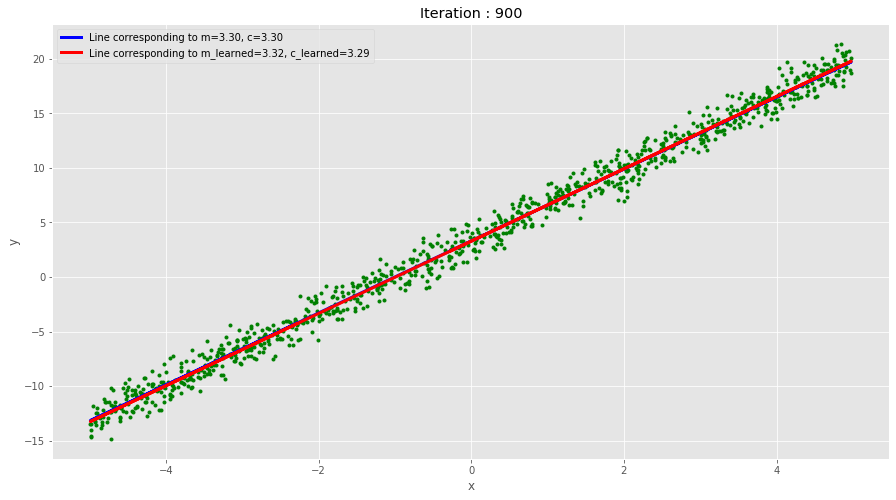

In [9]:
X = x
Y = y

n_iter = 1000
batch_size = 10

display_count = 100

lr = 0.001
m = 2
c = 1
loss = torch.zeros(n_iter)

for i in range(0, n_iter):
    # Select randomly a training data point
    k = torch.randint(0, len(Y) - 1, (batch_size,))
    # Compute gradient of m and c
    g_m, g_c = gradient_m_and_c(X, Y, m, c, k)
    # Update m and c
    m, c = update_m_and_c(m, c, g_m, g_c, lr)
    # Compute error
    e = Y - m * X - c
    # Compute loss function
    loss[i] = torch.sum(torch.mul(e, e))
    
    if i % display_count == 0:
        print('iteration: {}, loss: {:.3f}, updated m: {:.3f}, updated c: {:.3f}'.format(i, loss[i], m, c))
        y_pred = m * X + c
        # Plot the line corresponding to the learned m and c
        plt.plot(X, Y, '.', color='g')
        plt.plot(X, y_line, color='b', label='Line corresponding to m={:.2f}, c={:.2f}'.
                 format(m_line, c_line), linewidth=3)
        plt.plot(X, y_pred, color='r', label='Line corresponding to m_learned={:.2f}, c_learned={:.2f}'.
                 format(m, c), linewidth=3)
        plt.title("Iteration : {}".format(i))
        plt.legend()

        plt.ylabel('y')
        plt.xlabel('x')
        plt.show()


Loss of after last batch: 946.6669311523438
Learned "m" value: 3.331448554992676
Learned "c" value: 3.334205150604248


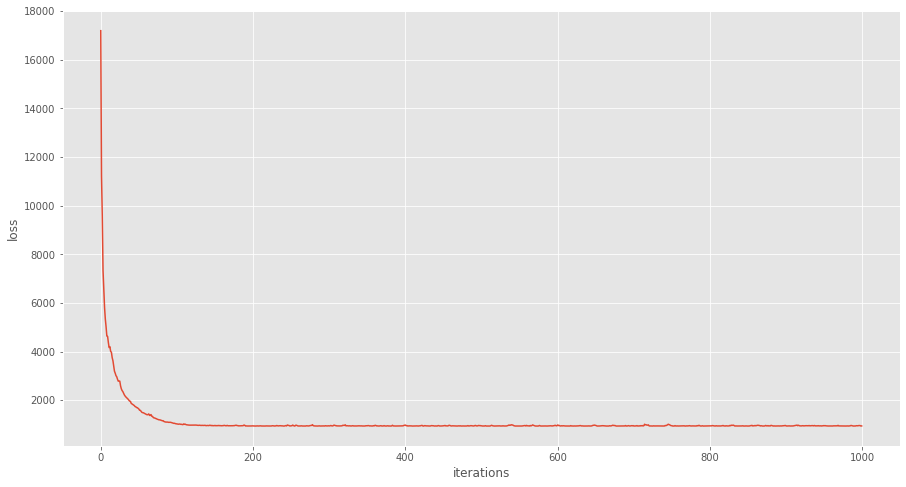

In [10]:
print('Loss of after last batch: {}'.format(loss[-1]))
print('Learned "m" value: {}'.format( m))
print('Learned "c" value: {}'.format( c))

# Plot loss
plt.plot(loss.numpy())
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()